# CA Public Schools (2013)

In [7]:
# All the data for this notbook has been obtained from the [CA dept of Education](http://star.cde.ca.gov/star2013/ResearchFileList.aspx?rf=True&ps=True)

In [32]:
import numpy as np
import pandas as pd
%matplotlib inline

In [33]:
test_data = pd.read_csv('ca2013_1_csv_v3.txt')
entities_data = pd.read_csv('ca2013entities_csv.txt')

In [3]:
## Number of schools by county

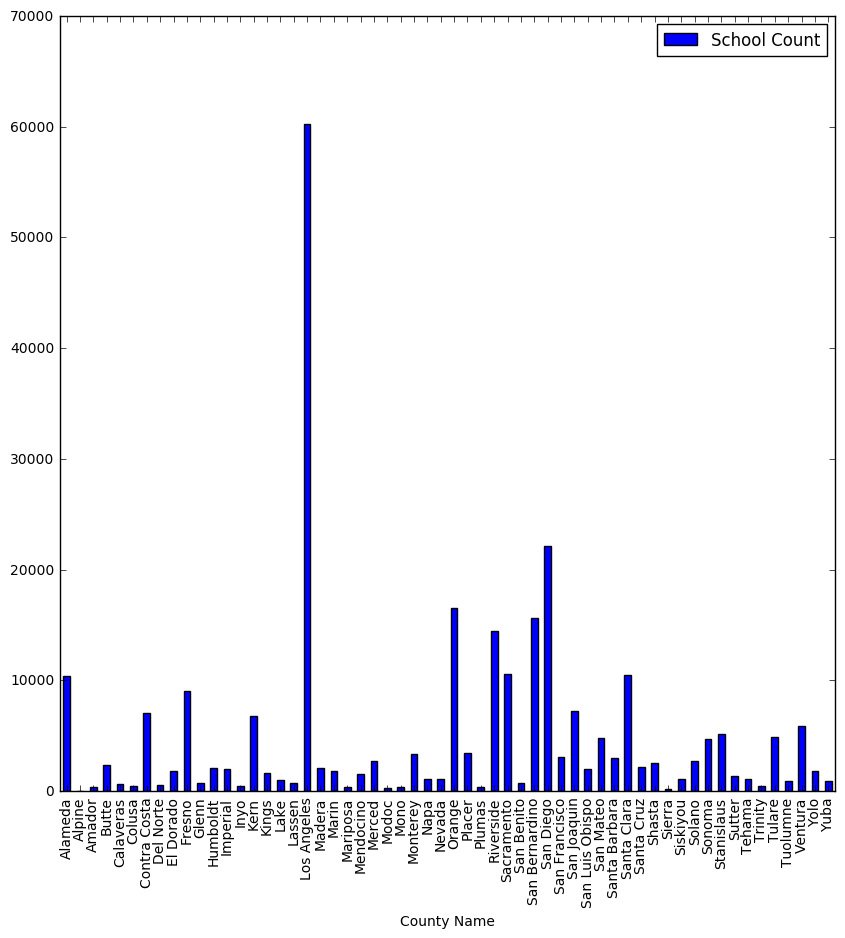

In [34]:
# When the School Code is 0000000 it indicates a summary stat
test_data_no_summaries = test_data[test_data['School Code']!=0]
# get only county and school count
schools_by_county_id = pd.DataFrame(test_data_no_summaries.groupby('County Code').size(), columns=['School Count']).reset_index()
county_names = entities_data[['County Code', 'County Name']].drop_duplicates()
# When County Code is [0,99] they indicate state
county_names = county_names[(county_names['County Code'] != 0) & (county_names['County Code'] != 99)]
schools_by_county_name = pd.merge(county_names, schools_by_county_id, on='County Code', how='inner')
# plot it !
schools_by_county_name.plot(x='County Name', y='School Count', kind='bar', figsize=(10,10))

In [ ]:
## Percentage of students in CA, proficient at each grade level on CST (California Standards Tests) Mathematics

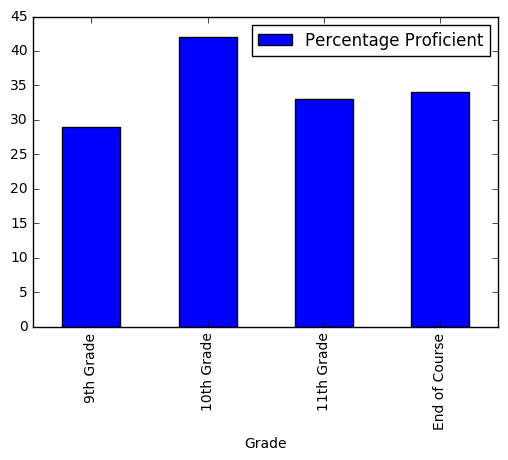

In [35]:
test_data_only_summaries = test_data[(test_data['County Code']==0) & 
                                     (test_data['District Code']==0) &
                                     (test_data['School Code']==0) &
                                     (test_data['Test Type']=='C') & 
                                     (test_data['Mean Scale Score']!='*') & 
                                     (test_data['Test Id'] == 15)][['Grade', 'Percentage Proficient']]

test_data_only_summaries[['Grade', 'Percentage Proficient']] = test_data_only_summaries[['Grade', 'Percentage Proficient']].apply(pd.to_numeric)
test_data_only_summaries.loc[test_data_only_summaries['Grade'] == 9, 'Grade'] = '9th Grade'
test_data_only_summaries.loc[test_data_only_summaries['Grade'] == 10, 'Grade'] = '10th Grade'
test_data_only_summaries.loc[test_data_only_summaries['Grade'] == 11, 'Grade'] = '11th Grade'
test_data_only_summaries.loc[test_data_only_summaries['Grade'] == 13, 'Grade'] = 'End of Course'
test_data_only_summaries.plot(kind='bar', x='Grade', y='Percentage Proficient')

In [ ]:
## Top 5 elementary schools whith the best median scores in CST (grades 1 through 5)

In [125]:
def cst_data(grades):
    test_data_only_cst = test_data_no_summaries[(test_data_no_summaries['School Code'] != 1) & 
                                                (test_data_no_summaries['Test Type'] == 'C') & 
                                                (test_data_no_summaries['Mean Scale Score'] != '*') & 
                                                (test_data_no_summaries['Mean Scale Score'] != '') & 
                                                (test_data_no_summaries['Mean Scale Score'].notnull()) &
                                                (test_data_no_summaries['Grade'].isin(grades))
                                               ]




    test_data_only_cst.loc[:,'Mean Scale Score'] = test_data_only_cst['Mean Scale Score'].astype(float).dropna()
    test_data_only_cst_median = test_data_only_cst.groupby(['School Code'])['Mean Scale Score'].median()
    test_data_only_cst_median.sort_values(inplace=True, ascending=False)
    top_5 = test_data_only_cst_median[0:5]
    top_5 = top_5.reset_index()
    top_5_schools = pd.merge(top_5, entities_data, how='inner', on=['School Code'])
    return top_5_schools[['County Name', 'District Name', 'School Name']]

cst_data([1,2,3,4,5])

,County Name,District Name,School Name
0,San Francisco,San Francisco Unified,Chin (John Yehall) Elementary
1,Orange,Orange Unified,Villa Park Elementary
2,Alameda,Fremont Unified,Mission San Jose Elementary
3,Santa Clara,Palo Alto Unified,Hoover (Herbert) Elem
4,Alameda,Fremont Unified,Chadbourne (Joshua) Elementary


In [ ]:
## Top 5 middle schools whith the best median scores in CST (grades 6 through 8)

In [126]:
cst_data([6,7,8])

,County Name,District Name,School Name
0,Alameda,Fremont Unified,Hopkins (William) Junior High
1,Los Angeles,ABC Unified,Whitney (Gretchen) High
2,Alameda,Fremont Unified,Weibel (Fred E.) Elementary
3,Alameda,Fremont Unified,Mission San Jose Elementary
4,Orange,Orange Unified,Villa Park Elementary


In [ ]:
## Top 5 high schools whith the best median scores in CST (grades 9 through 12)

In [127]:
cst_data([9,10,11])

,County Name,District Name,School Name
0,Los Angeles,ABC Unified,Whitney (Gretchen) High
1,Orange,Anaheim Union High,Oxford Academy
2,Alameda,Fremont Unified,Mission San Jose High
3,Santa Clara,Fremont Union High,Monta Vista High
4,Santa Clara,Fremont Union High,Lynbrook High
